**K181161 Sufyan Siddiqui DSCI Mid-II Take Home Exam Paper B**

In [22]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split,KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as stds
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [23]:
#Q1a
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [24]:
df2 = df[['Glucose',  'BloodPressure', 'SkinThickness' ,'DiabetesPedigreeFunction', 'Age']]
df2.head()

,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age
0,89,66,23,0.167,21
1,137,40,35,2.288,33
2,78,50,32,0.248,26
3,197,70,45,0.158,53
4,189,60,23,0.398,59


In [25]:
scaler=stds()
scaled_data=scaler.fit_transform(df2)
newdata=pd.DataFrame(scaled_data)
newdata.head().describe()

,0,1,2,3,4
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.500542,-1.080354,0.237672,0.361062,0.744675
std,1.752842,0.980782,0.877776,2.630139,1.645106
min,-1.412915,-2.461427,-0.582083,-1.051077,-0.963548
25%,-1.062114,-1.658478,-0.582083,-1.025340,-0.472679
50%,0.468651,-0.855528,0.275800,-0.793701,0.214537
75%,2.126981,-0.373759,0.561761,-0.364740,2.178012
max,2.382108,-0.052579,1.514965,5.040165,2.767055


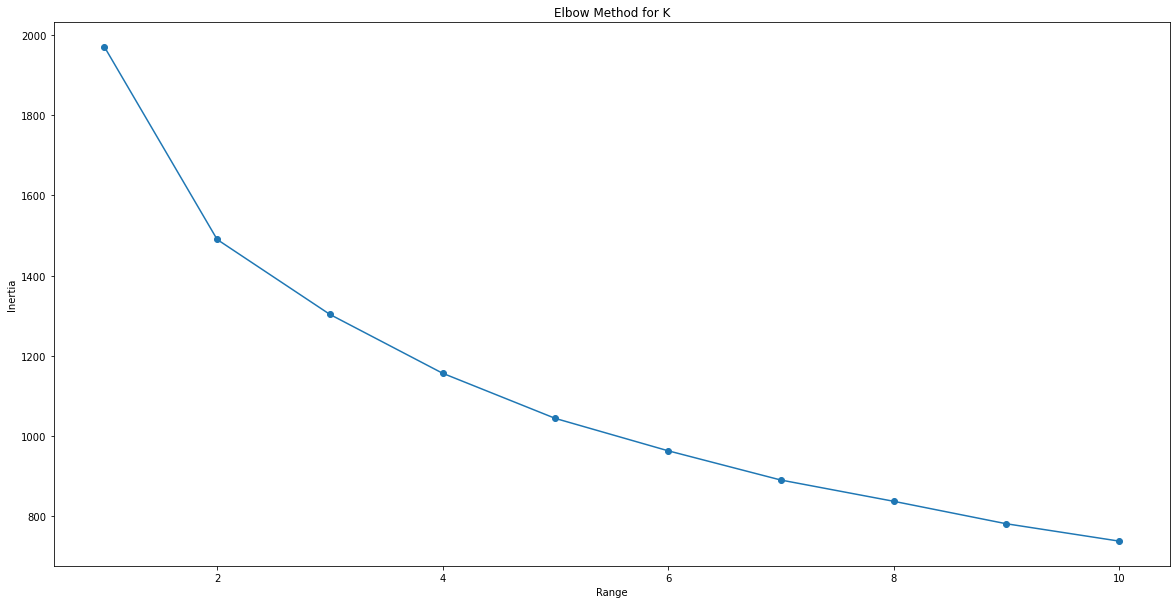

In [26]:
inert=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300)
    kmeans.fit(newdata)
    inert.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1,11),inert,marker='o')
plt.xlabel("Range")
plt.ylabel("Inertia")
plt.title("Elbow Method for K")
#plt.legend()
plt.show()

In [27]:
kmeans = KMeans(n_clusters=5,init='k-means++')
kmeans.fit(newdata)
kmeans.inertia_
pred = kmeans.predict(newdata)
frame=pd.DataFrame(pred)
frame['Cluster']=pred
frame.groupby('Cluster').size()


Cluster
0    102
1     72
2    128
3     62
4     30
dtype: int64

In [28]:
newdata['cluster']=pred
newdata.head()

,0,1,2,3,4,cluster
0,-1.062114,-0.373759,-0.582083,-1.025340,-0.963548,2
1,0.468651,-2.461427,0.561761,5.040165,0.214537,4
2,-1.412915,-1.658478,0.275800,-0.793701,-0.472679,2
3,2.382108,-0.052579,1.514965,-1.051077,2.178012,3
4,2.126981,-0.855528,-0.582083,-0.364740,2.767055,3


6921.490549018079


Text(0.5, 1.0, 'Relationship between Glucose & Insulin')

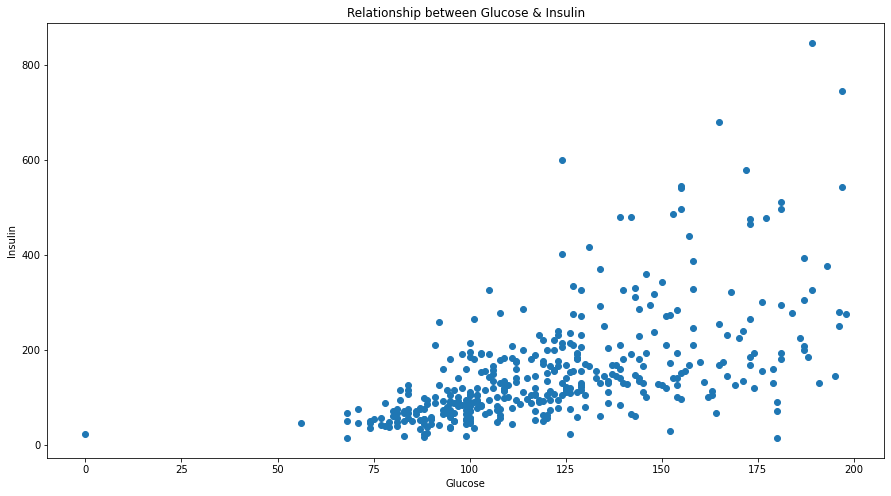

In [29]:
#Q1B
from sklearn.metrics import mean_squared_error

df2 = pd.read_csv('diabetes.csv')
df2.head()
df2.drop(columns=['SkinThickness','DiabetesPedigreeFunction','Age'],inplace=True)
df2.head()
X=df2['Glucose'].values.reshape(-1,1)
Y=df2['Insulin'].values.reshape(-1,1)
t_size=0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_size)

lm = LinearRegression()
model = lm.fit(X_train,Y_train)
ypred2 = model.predict(X_test)
MSE = mean_squared_error(Y_test, ypred2)
print(MSE)
X1=df2['Glucose'].values
Y1 = df2['Insulin'].values
df3 = pd.DataFrame(X1,Y1)
plt.figure(figsize=(15,8))
plt.scatter(X1,Y1,marker='o')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Relationship between Glucose & Insulin')


In [30]:
#Q2a
df = pd.read_csv('Iris.csv')
df.head()
df.drop(columns=['Sepal_length'],inplace=True)
df.head()

,Sepal_width,Petal_length,Petal_width,Species
0,3.5,1.4,0.2,Setosa
1,3.0,1.4,0.2,Setosa
2,3.2,1.3,0.2,Setosa
3,3.1,1.5,0.2,Setosa
4,3.6,1.4,0.2,Setosa


In [31]:
array = df.values
X = array[:,0:3]

Y = array[:,3]
t_size = 0.20
acc=[]
tr=[]
ts=[]
i=1
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    score = cross_val_score(knn,X,Y,scoring='accuracy',cv=10)
    acc.append((i,score.mean()))
    print( "Accuracy:",score.mean(),"K:",i)
print("K, Max Accuracy")
print(max(acc, key=operator.itemgetter(1)))

Accuracy: 0.9533333333333334 K: 1
Accuracy: 0.9466666666666667 K: 2
Accuracy: 0.9600000000000002 K: 3
Accuracy: 0.96 K: 4
Accuracy: 0.9600000000000002 K: 5
Accuracy: 0.96 K: 6
Accuracy: 0.9600000000000002 K: 7
Accuracy: 0.9533333333333334 K: 8
Accuracy: 0.9533333333333334 K: 9
Accuracy: 0.96 K: 10
K, Max Accuracy
(3, 0.9600000000000002)


In [32]:
#Q2b
crossvalid = KFold(5)
for train, test in crossvalid.split(X):
    dtree = DecisionTreeClassifier(criterion='gini',min_weight_fraction_leaf=0.011)
    model = dtree.fit(X[train],Y[train])
    ypred = model.predict(X[test])
    a=accuracy_score(Y[test],ypred)
    print("Accuracy: ",a)
    print("Report: ",classification_report(Y[test],ypred))


Accuracy:  1.0
Report:                precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy:  1.0
Report:                precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        20
  Versicolor       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy:  0.8666666666666667
Report:                precision    recall  f1-score   support

  Versicolor       1.00      0.87      0.93        30
   Virginica       0.00      0.00      0.00         0

    accuracy                           0.87        30
   macro avg       0.50      0.43      0.46        30
weighted avg       1.00      0.87      0.